In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_DaggerExact/"
#workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_Add2Steps"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Step_KeepOutlier"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_AddVarSteps_1to2StepbeforeFail_RemovebyClip/"
#workingDirectory = "/media/jiayu/Seagate/Rubbles_Add2Steps_1StepbeforeFail_RemovebyClip/"
workingDirectory = "/media/jiayu/Seagate/LargeSlope_Angle_23_X_negative/"

#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
TrainingSetPath = [workingDirectory + "/DataSet/"+"Training_Init"]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Initial",
#                    workingDirectory + "/DataSet/"+"TrainingAug2Steps_1StepbeforeFail_1Time_RemovebyClip",]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_1Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_2Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_3Time"]

ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet"
TestSetPath = workingDirectory + "/DataSet/"+"TestSet"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "/ML_Models/"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /media/jiayu/Seagate/LargeSlope_Angle_23_X_negative/


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout

In [4]:
#Load DataSet File

#For training set
for trainingset_idx in range(len(TrainingSetPath)):
    trainingset_file = TrainingSetPath[trainingset_idx] + "/data"+'.p'
    trainingset = pickle.load(open(trainingset_file,"rb"))
    
    print("For dataset: ", trainingset_idx)
    print("DataSet Sizes: ")
    
    if trainingset_idx == 0:
        x_train = trainingset["input"]
        y_train = trainingset["output"]
    else:
        x_train = np.concatenate((x_train,trainingset["input"]),axis=0)
        y_train = np.concatenate((y_train,trainingset["output"]),axis=0)
    
    print(x_train.shape)
    print(y_train.shape)

    print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
    print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
    print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
    print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
    print("Pre Process Mode: ",trainingset["PreProcessMode"])
    print(" ")

print("Final Data Set Size")
print(x_train.shape)
print(y_train.shape)
print(" ")

#For validation and Test

#Load Validation Set and Test Set
validationset_file = ValidationSetPath + "/data"+'.p'
validationset = pickle.load(open(validationset_file,"rb"))

testset_file = TestSetPath + "/data"+'.p'
testset = pickle.load(open(testset_file,"rb"))

x_valid = validationset["input"]
y_valid = validationset["output"]

x_test = testset["input"]
y_test = testset["output"]

print("Set Up for Validation Set")
print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
print("Pre Process Mode: ",validationset["PreProcessMode"])
print("Validation Set Size")
print(x_valid.shape)
print(y_valid.shape)
print(" ")

print(" ")

print("Set Up for Test Set")
print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
print("Number of Preview Steps: ", testset["NumPreviewSteps"])
print("Pre Process Mode: ",testset["PreProcessMode"])
print("Test Set Size")
print(x_test.shape)
print(y_test.shape)
print(" ")

For dataset:  0
DataSet Sizes: 
(21370, 85)
(21370, 11)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
Final Data Set Size
(21370, 85)
(21370, 11)
 
Set Up for Validation Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
Validation Set Size
(5000, 85)
(5000, 11)
 
 
Set Up for Test Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
Test Set Size
(5000, 85)
(5000, 11)
 


In [5]:
#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("Final Data Set Size")
# print(x_train.shape)
# print(y_train.shape)

input dim:  85
output dim: 11
 


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,), kernel_regularizer='l1'), #tanh
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    Dense(256, activation='relu', input_shape=(d_in,), ), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


In [69]:
#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mse') #0.0001

#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
#Batch size = 1280 for remove outlier, 2560 for keep outlier
history = model.fit(x = x_train, y = y_train, epochs = 500, batch_size = 1280, validation_data = (x_valid, y_valid),shuffle=True) #1280, 1000 epoch

Epoch 1/500
17/17 [==============================] - 0s 9ms/step - loss: 3.0915e-04 - val_loss: 9.2230e-04
Epoch 2/500
17/17 [==============================] - 0s 6ms/step - loss: 1.6468e-04 - val_loss: 9.4241e-04
Epoch 3/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3526e-04 - val_loss: 9.2448e-04
Epoch 4/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2990e-04 - val_loss: 9.2797e-04
Epoch 5/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2788e-04 - val_loss: 9.2430e-04
Epoch 6/500
17/17 [==============================] - 0s 6ms/step - loss: 1.2773e-04 - val_loss: 9.2754e-04
Epoch 7/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2844e-04 - val_loss: 9.2099e-04
Epoch 8/500
17/17 [==============================] - 0s 6ms/step - loss: 1.2850e-04 - val_loss: 9.3163e-04
Epoch 9/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2847e-04 - val_loss: 9.3967e-04
Epoch 10/500
17/17 [=================

Epoch 77/500
17/17 [==============================] - 0s 6ms/step - loss: 1.4621e-04 - val_loss: 9.4319e-04
Epoch 78/500
17/17 [==============================] - 0s 6ms/step - loss: 1.6023e-04 - val_loss: 9.4575e-04
Epoch 79/500
17/17 [==============================] - 0s 6ms/step - loss: 1.4503e-04 - val_loss: 9.3189e-04
Epoch 80/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3847e-04 - val_loss: 9.6074e-04
Epoch 81/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3715e-04 - val_loss: 9.3507e-04
Epoch 82/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3431e-04 - val_loss: 9.2885e-04
Epoch 83/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3615e-04 - val_loss: 9.2820e-04
Epoch 84/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3294e-04 - val_loss: 9.2583e-04
Epoch 85/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3282e-04 - val_loss: 9.5304e-04
Epoch 86/500
17/17 [========

17/17 [==============================] - 0s 6ms/step - loss: 1.4038e-04 - val_loss: 9.3483e-04
Epoch 153/500
17/17 [==============================] - 0s 5ms/step - loss: 1.3543e-04 - val_loss: 9.5329e-04
Epoch 154/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3784e-04 - val_loss: 9.4055e-04
Epoch 155/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3357e-04 - val_loss: 9.3014e-04
Epoch 156/500
17/17 [==============================] - 0s 6ms/step - loss: 1.4296e-04 - val_loss: 9.4036e-04
Epoch 157/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3788e-04 - val_loss: 9.4639e-04
Epoch 158/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3138e-04 - val_loss: 9.4607e-04
Epoch 159/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3483e-04 - val_loss: 9.2584e-04
Epoch 160/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3555e-04 - val_loss: 9.2119e-04
Epoch 161/500
17/17 [============

17/17 [==============================] - 0s 6ms/step - loss: 1.2919e-04 - val_loss: 9.2344e-04
Epoch 228/500
17/17 [==============================] - 0s 5ms/step - loss: 1.3923e-04 - val_loss: 9.4481e-04
Epoch 229/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3481e-04 - val_loss: 9.3745e-04
Epoch 230/500
17/17 [==============================] - 0s 5ms/step - loss: 1.3253e-04 - val_loss: 9.7985e-04
Epoch 231/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3162e-04 - val_loss: 9.3476e-04
Epoch 232/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2857e-04 - val_loss: 9.4853e-04
Epoch 233/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3295e-04 - val_loss: 9.1447e-04
Epoch 234/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3600e-04 - val_loss: 9.5081e-04
Epoch 235/500
17/17 [==============================] - 0s 5ms/step - loss: 1.3407e-04 - val_loss: 9.5321e-04
Epoch 236/500
17/17 [============

17/17 [==============================] - 0s 6ms/step - loss: 1.2929e-04 - val_loss: 9.4017e-04
Epoch 303/500
17/17 [==============================] - 0s 6ms/step - loss: 1.2948e-04 - val_loss: 9.5261e-04
Epoch 304/500
17/17 [==============================] - 0s 5ms/step - loss: 1.3230e-04 - val_loss: 9.4267e-04
Epoch 305/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3233e-04 - val_loss: 9.5042e-04
Epoch 306/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3446e-04 - val_loss: 9.6361e-04
Epoch 307/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3011e-04 - val_loss: 9.1959e-04
Epoch 308/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3004e-04 - val_loss: 9.3090e-04
Epoch 309/500
17/17 [==============================] - 0s 6ms/step - loss: 1.2850e-04 - val_loss: 9.6081e-04
Epoch 310/500
17/17 [==============================] - 0s 5ms/step - loss: 1.3150e-04 - val_loss: 9.1535e-04
Epoch 311/500
17/17 [============

17/17 [==============================] - 0s 6ms/step - loss: 1.2586e-04 - val_loss: 9.4733e-04
Epoch 378/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3014e-04 - val_loss: 9.4695e-04
Epoch 379/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2889e-04 - val_loss: 9.4255e-04
Epoch 380/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2740e-04 - val_loss: 9.5458e-04
Epoch 381/500
17/17 [==============================] - 0s 6ms/step - loss: 1.2638e-04 - val_loss: 9.3694e-04
Epoch 382/500
17/17 [==============================] - 0s 6ms/step - loss: 1.2571e-04 - val_loss: 9.2657e-04
Epoch 383/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2643e-04 - val_loss: 9.2956e-04
Epoch 384/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3142e-04 - val_loss: 9.3639e-04
Epoch 385/500
17/17 [==============================] - 0s 5ms/step - loss: 1.3046e-04 - val_loss: 9.4807e-04
Epoch 386/500
17/17 [============

17/17 [==============================] - 0s 5ms/step - loss: 1.2682e-04 - val_loss: 9.4290e-04
Epoch 453/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2709e-04 - val_loss: 9.5845e-04
Epoch 454/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2669e-04 - val_loss: 9.4501e-04
Epoch 455/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2780e-04 - val_loss: 9.2556e-04
Epoch 456/500
17/17 [==============================] - 0s 5ms/step - loss: 1.2569e-04 - val_loss: 9.3649e-04
Epoch 457/500
17/17 [==============================] - 0s 5ms/step - loss: 1.3087e-04 - val_loss: 9.4521e-04
Epoch 458/500
17/17 [==============================] - 0s 5ms/step - loss: 1.4034e-04 - val_loss: 9.2553e-04
Epoch 459/500
17/17 [==============================] - 0s 6ms/step - loss: 1.3259e-04 - val_loss: 9.3642e-04
Epoch 460/500
17/17 [==============================] - 0s 5ms/step - loss: 1.3139e-04 - val_loss: 9.4229e-04
Epoch 461/500
17/17 [============

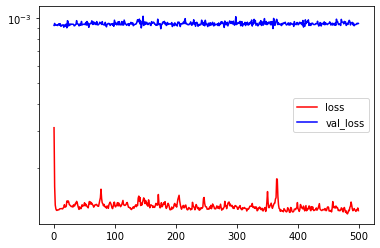

In [70]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.show()

In [71]:
#Save Trained Model
#MLmodel_name = "NN_Model_Valid_" + trainingset["PreProcessMode"] + "_Dagger_InitSet_2Iter"
#MLmodel_name = "NN_Model" + "_" + "AugVarStep_1to2StepbeforeFail_3Time_RemovebyClip_SmallThre"
MLmodel_name = "NN_Model" + "_" + "InitialSet"
model.save(ML_Model_Path + MLmodel_name)

INFO:tensorflow:Assets written to: /media/jiayu/Seagate/LargeSlope_Angle_23_X_negative//ML_Models/NN_Model_InitialSet/assets


In [72]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]
datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + MLmodel_name+ '/datasetSettings' +'.p', "wb"))

In [73]:
#Show Prediction Result for Training
from sklearn import preprocessing

datapoint_num = 33
y_pred_temp = model.predict(np.array([x_train[datapoint_num]]))

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))

[-9.07821036e-02 -3.31458895e-02  7.74266390e-01  1.25860383e-01
  9.44217431e-02 -4.26340612e-03 -1.17954869e-03 -7.03362466e-04
  3.27587628e-04 -2.52477771e-01 -1.97323335e-01  1.63386488e-01
  0.00000000e+00  4.34687402e-01  8.63058304e-01 -1.03553277e-12
 -1.40312598e-01  8.63058304e-01 -1.03553277e-12 -1.40312598e-01
 -1.50710342e-01 -1.03547726e-12  4.34687402e-01 -1.50710342e-01
 -1.03547726e-12 -1.40312598e-01 -1.23528802e-01  1.63238898e-01
 -7.15312598e-01 -1.23528802e-01  1.63238898e-01 -7.15312598e-01
 -1.13695995e+00  1.65265763e-01 -1.40312598e-01 -1.13695995e+00
  1.65265763e-01  4.34687402e-01 -1.44655945e-01  3.63597126e-02
 -1.40312598e-01 -1.29414448e-01  1.27892618e-01 -1.40312598e-01
 -1.11583280e+00  2.92144949e-01  4.34687402e-01 -1.13107430e+00
  2.00612044e-01  1.00968740e+00  8.40056243e-01 -1.38139014e-01
  4.34687402e-01  8.58710075e-01 -2.61133173e-02  4.34687402e-01
 -1.27708281e-01  1.38139014e-01  1.00968740e+00 -1.46362112e-01
  2.61133173e-02  1.00968

Data Kept Original Form, But need to scale back to meters
[0.06155035 0.06156018 0.06157594 0.06158588 0.06158747 0.06159318
 0.06168313 0.06174151 0.0617531  0.06177521 0.06177932 0.0618281
 0.06182899 0.06183657 0.06185253 0.06189248 0.06190004 0.06191104
 0.06191486 0.06192473 0.06193342 0.06195932 0.06196308 0.06196735
 0.06200968 0.06202425 0.06202608 0.06204023 0.06204479 0.06205481
 0.06206199 0.06207386 0.06207659 0.06209848 0.06214875 0.06215154
 0.06215632 0.06221035 0.06221355 0.06222449 0.06222487 0.06223612
 0.06236135 0.06239984 0.06240358 0.06240586 0.06241059 0.06242532
 0.06244328 0.06245637 0.06245742 0.06246603 0.06249284 0.0624938
 0.06251245 0.06256309 0.06261047 0.06263583 0.06264703 0.06265009
 0.0626721  0.06268895 0.06272497 0.06272601 0.06274676 0.06276476
 0.06277305 0.06277553 0.06283232 0.06283807 0.06287783 0.06293017
 0.06293465 0.06293647 0.06294615 0.06295037 0.06299393 0.06299938
 0.06304461 0.06304746 0.06310309 0.06313656 0.06314606 0.06316942
 0.063

(array([ 4.,  0.,  1.,  3.,  0., 13.,  3.,  3.,  0.,  5.,  3.,  1.,  6.,
         3.,  1.,  9.,  2.,  0.,  2.,  4.,  4.,  0.,  3.,  6.,  0.,  9.,
         6.,  2.,  3.,  4.]),
 array([ 0.        ,  0.96666667,  1.93333333,  2.9       ,  3.86666667,
         4.83333333,  5.8       ,  6.76666667,  7.73333333,  8.7       ,
         9.66666667, 10.63333333, 11.6       , 12.56666667, 13.53333333,
        14.5       , 15.46666667, 16.43333333, 17.4       , 18.36666667,
        19.33333333, 20.3       , 21.26666667, 22.23333333, 23.2       ,
        24.16666667, 25.13333333, 26.1       , 27.06666667, 28.03333333,
        29.        ]),
 <a list of 30 Patch objects>)

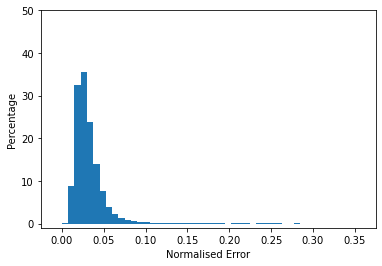

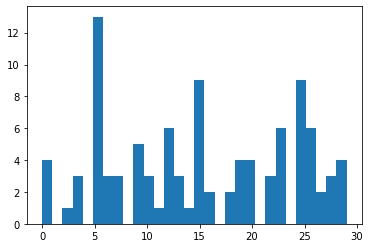

In [74]:
#Error Stat with Training Set
import matplotlib.pyplot as plt
y_pred_train = model.predict(x_train)

if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_train_originalform-y_pred_train_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-1000:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

##Plot prediction on the initial dataset
err_initdata=err[0:12000+1]

err_initdata_sorted = np.sort(err_initdata)
print(err_initdata_sorted[-100:])  # print the 100 biggest error

err_initdata_idx_sorted = np.argsort(err_initdata)
print(err_initdata_idx_sorted[-100:]%30)
selected_err=err_initdata_idx_sorted[-100:]%30
fig=plt.figure();   ax = fig.gca()
plt.hist(selected_err, bins=30)

Data Kept Original Form, But need to scale back to meters
[0.00708737 0.00713982 0.00793114 ... 1.79281164 2.172831   2.56889567]
Error Mean:  0.05292238031871567
Error Std 0.08575294017319963


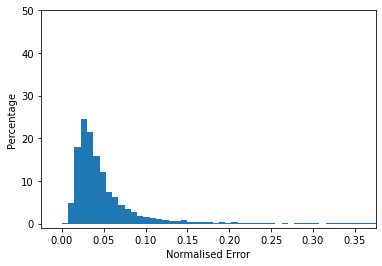

In [42]:
#Error Stat with Validation Set

y_pred_valid = model.predict(x_valid)


if validationset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
    y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
    y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())



Data Kept Original Form, But need to scale back to meters
[0.00708737 0.00713982 0.00793114 ... 1.79281164 2.172831   2.56889567]
Error Mean:  0.05292238031871567
Error Std 0.08575294017319963


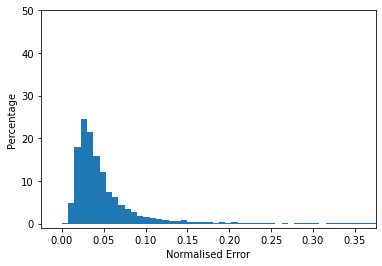

In [43]:
#Error Stat with Test Set

y_pred_test = model.predict(x_test)


if testset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
    y_true_test_originalform = y_test/testset["VectorScaleFactor"]
elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
    y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())